In [181]:
# Import necessary packages
import re
from os.path import join
# utilities
import pickle
import bcolz
import numpy as np
import pandas as pd
import math
# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer
#ekphrasis
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons
#gensim
import gensim
#torch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [182]:
from datetime import datetime
import langid
from sklearn import preprocessing

In [183]:
# Importing the dataset
DATASET_ENCODING = "ISO-8859-1"
df1 = pd.read_csv('D:/data2.csv',encoding=DATASET_ENCODING)
df2 = pd.read_csv('D:/data4.csv',encoding=DATASET_ENCODING)
df3 = pd.read_csv('D:/data5.csv',encoding=DATASET_ENCODING)
df4 = pd.read_csv('D:/data6.csv',encoding=DATASET_ENCODING)
df5 = pd.read_csv('D:/data7.csv',encoding=DATASET_ENCODING)
df6 = pd.read_csv('D:/data8.csv',encoding=DATASET_ENCODING)
df7 = pd.read_csv('D:/data9.csv',encoding=DATASET_ENCODING)
df8 = pd.read_csv('D:/data10.csv',encoding=DATASET_ENCODING)
df9 = pd.read_csv('D:/data11.csv',encoding=DATASET_ENCODING)
df10 = pd.read_csv('D:/data12.csv',encoding=DATASET_ENCODING)
df11 = pd.read_csv('D:/data13.csv',encoding=DATASET_ENCODING)
df12 = pd.read_csv('D:/data14.csv',encoding=DATASET_ENCODING)
df13 = pd.read_csv('D:/data15.csv',encoding=DATASET_ENCODING)
df14 = pd.read_csv('D:/data16.csv',encoding=DATASET_ENCODING)
df15 = pd.read_csv('D:/data17.csv',encoding=DATASET_ENCODING)

In [192]:
test = pd.read_csv('D:/data18.csv',encoding=DATASET_ENCODING)

In [184]:
df1.columns = df14.columns
df2.columns = df14.columns
df = pd.concat([df1,df2,df12,df13,df14,df15])

In [185]:
df = df.reset_index(drop = True)
df

,id,link,country,time_id,recommend,value,fun,reviews,game,date,...,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43
0,1,https://steamcommunity.com/profiles/7656119833...,Other,10,Not Recommended,0,0,Ulan salak gibi gittiniz harita seÃ§meyi kaldÄ...,https://steamcommunity.com/app/578080,"12 February, 2021",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,https://steamcommunity.com/profiles/7656119833...,Other,9,Recommended,2,0,TÃ¼rkÃ§e dil desteÄi olsa keÅke onun dÄ±ÅÄ±...,https://steamcommunity.com/app/1145360,"8 December, 2020",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,https://steamcommunity.com/profiles/7656119833...,Other,8,Not Recommended,3,0,Para basmadan en ufak zevk alamazsÄ±nÄ±z. Size...,https://steamcommunity.com/app/236390,"26 November, 2020",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,https://steamcommunity.com/profiles/7656119833...,Other,7,Recommended,21,0,"MuhteÅem grafikleri, sinematik sunumu, ÅarkÄ...",https://steamcommunity.com/app/261570,"26 November, 2020",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,https://steamcommunity.com/profiles/7656119833...,Other,6,Not Recommended,6,0,"Hikayesi, mekanikleri Ã§Ä±ktÄ±ÄÄ± yÄ±la gÃ¶re...",https://steamcommunity.com/app/302510,"26 November, 2020",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23955,2395,https://steamcommunity.com/profiles/7656119802...,Other,5,Recommended,0,0,10/10\t\t\t\t\t\t\t\t,https://steamcommunity.com/app/581320,"1 July, 2019",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23956,2395,https://steamcommunity.com/profiles/7656119802...,Other,4,Recommended,0,1,10/10\t\t\t\t\t\t\t\t,https://steamcommunity.com/app/755790,"8 December, 2018",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23957,2395,https://steamcommunity.com/profiles/7656119802...,Other,3,Recommended,0,0,10/10\t\t\t\t\t\t\t\t,https://steamcommunity.com/app/675010,"22 November, 2018",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23958,2395,https://steamcommunity.com/profiles/7656119802...,Other,2,Recommended,3,0,"9,5/10\t\t\t\t\t\t\t\t",https://steamcommunity.com/app/227300,"6 September, 2018",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
df['english'] = df['reviews'].apply(lambda x: langid.classify(x)[0])

In [187]:
df = df[df['english'] == 'en']
df = df.reset_index(drop = True)

In [193]:
test['english'] = test['reviews'].apply(lambda x: langid.classify(x)[0])
test = test[test['english'] == 'en']
test = test.reset_index(drop = True)

In [131]:
data=df[['id','value','reviews','time_id']]

In [196]:
test = test[['ID','value','reviews','time_id']]

In [132]:
user = data.groupby('id').count().reset_index()
user = user[user['value']==10]['id']

In [199]:
test_user = test.groupby('ID').count().reset_index()
test_user = test_user[test_user['value']==10]['ID']
test = pd.merge(test[['ID','value','reviews','time_id']],test_user,on = 'ID')
test

,ID,value,reviews,time_id
0,1,0,kox\t\t\t\t\t\t\t\t,10
1,1,0,Ok\t\t\t\t\t\t\t\t,9
2,1,0,Fajna gra polecan\t\t\t\t\t\t\t\t,8
3,1,0,Fajna gra polecan\t\t\t\t\t\t\t\t,7
4,1,0,Ok\t\t\t\t\t\t\t\t,6
...,...,...,...,...
235,85,0,"i dont think i need to review, this game made ...",5
236,85,0,its a mafia game.... and it comes from 2K... s...,4
237,85,0,its my favorite up to date\t\t\t\t\t\t\t\t,3
238,85,0,freaking addicting!!!!\t\t\t\t\t\t\t\t,2


In [133]:
data = pd.merge(df[['id','value','reviews','time_id']],user,on = 'id')
data

,id,value,reviews,time_id
0,2,0,<3\t\t\t\t\t\t\t\t,10
1,2,0,so good!\t\t\t\t\t\t\t\t,9
2,2,0,good\t\t\t\t\t\t\t\t,8
3,2,0,good\t\t\t\t\t\t\t\t,7
4,2,0,good\t\t\t\t\t\t\t\t,6
...,...,...,...,...
5005,2055,1,"Overall the game is very fun, it remind me of ...",5
5006,2055,1,Best Comedy of the Year. 10/10\t\t\t\t\t\t\t\t,4
5007,2055,0,Great\t\t\t\t\t\t\t\t,3
5008,2055,0,Okay I just wanna say that this game is a good...,2


In [134]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['url', 'email', 'percent', 'money', 'phone', 'user',
        'time', 'url', 'date', 'number'],
    # terms that will be annotated
    annotate={"hashtag", "allcaps", "elongated", "repeated",
        'emphasis', 'censored'},
    fix_html=True,  # fix HTML tokens
    
    # corpus from which the word statistics are going to be used 
    # for word segmentation 
    segmenter="twitter", 
    
    # corpus from which the word statistics are going to be used 
    # for spell correction
    corrector="twitter", 
    
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)

sentences = [
    "CANT WAIT for the new season of #TwinPeaks ＼(^o^)／!!! #davidlynch #tvseries :)))",
    "I saw the new #johndoe movie and it suuuuucks!!! WAISTED $10... #badmovies :/",
    "@SentimentSymp:  can't wait for the Nov 9 #Sentiment talks!  YAAAAAAY !!! :-D http://sentimentsymposium.com/."
]

for s in sentences:
    print(" ".join(text_processor.pre_process_doc(s)))

Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading twitter - 1grams ...
<allcaps> cant wait </allcaps> for the new season of <hashtag> twin peaks </hashtag> ＼(^o^)／ ! <repeated> <hashtag> david lynch </hashtag> <hashtag> tv series </hashtag> <happy>
i saw the new <hashtag> john doe </hashtag> movie and it sucks <elongated> ! <repeated> <allcaps> waisted </allcaps> <money> . <repeated> <hashtag> bad movies </hashtag> <annoyed>
<user> : can not wait for the <date> <hashtag> sentiment </hashtag> talks ! <allcaps> yay <elongated> </allcaps> ! <repeated> <laugh> <url>


In [221]:
data_set = data
data_set.loc[:,'reviews'] = data_set.loc[:,'reviews'].apply(lambda x: " ".join(text_processor.pre_process_doc(x)))

In [222]:
test_set = test
test_set.loc[:,'reviews'] = test_set.loc[:,'reviews'].apply(lambda x: " ".join(text_processor.pre_process_doc(x)))

In [223]:
test_set.loc[3,'reviews']

'fajna gra polecan'

In [224]:
import nltk
from nltk.tokenize import word_tokenize

In [225]:
data_set['len'] = data_set['reviews'].apply(lambda x: len(x.split(' ')))

In [226]:
# data_set = data_set[data_set['len']>10]
# data_set = data_set.reset_index()

In [233]:
Ns = []
Vs = []
As = []
Ss = []
Ones = []
Twos = []
Longs = []
Ws = []
for index,row in data_set.iterrows():
    tag = nltk.pos_tag(word_tokenize(row['reviews']))
    N = 0
    V = 0
    A = 0
    S = 0
    W = len(tag)
    Long = 0
    One = 0
    Two = 0
    for i in tag:
        if len(i[0]) == 1 and i[0] not in "~!@#$%^&*()_+-*/<>,.[]\/":
            One = One + 1
        elif len(i[0]) == 2:
            Two = Two + 1
        elif len(i[0]) > 2:
            Long = Long + 1

        if i[1] == 'NN' or i[1] == 'NNS':
            N = N + 1
        elif i[1] == '.':
            S = S + 1
        elif i[1] == 'VB' or i[1] == 'VBD' or i[1] == 'VBG' or i[1] == 'VBN' or i[1] == 'VBP' or i[1] == 'VBZ':
            V = V + 1
        elif i[1] == 'JJ' or i[1] == 'JJR' or i[1] == 'JJS':
            A = A + 1
    Ns.append(N)
    Ss.append(S)
    Vs.append(V)
    As.append(A)
    Ones.append(One)
    Twos.append(Two)
    Longs.append(Long)
    Ws.append(W)

In [234]:
from pandas.core.frame import DataFrame
data_dict = {'Noun':Ns,'Verb':Vs,'Adjective':As,'One':Ones,'Two':Twos,
             'Long':Longs,'Sentence':Ss,'Word':Ws,}
X = DataFrame(data_dict)
# X2 = df[['country','total_time','review_time']]
# X['country'] = df['country']
# X['review_time'] = df['review_time']
# X = pd.get_dummies(X,columns = ['country'],drop_first = True)
y = data_set.loc[:,'value'].reset_index()['value']

In [235]:
Ns = []
Vs = []
As = []
Ss = []
Ones = []
Twos = []
Longs = []
Ws = []
for index,row in test_set.iterrows():
    tag = nltk.pos_tag(word_tokenize(row['reviews']))
    N = 0
    V = 0
    A = 0
    S = 0
    W = len(tag)
    Long = 0
    One = 0
    Two = 0
    for i in tag:
        if len(i[0]) == 1 and i[0] not in "~!@#$%^&*()_+-*/<>,.[]\/":
            One = One + 1
        elif len(i[0]) == 2:
            Two = Two + 1
        elif len(i[0]) > 2:
            Long = Long + 1

        if i[1] == 'NN' or i[1] == 'NNS':
            N = N + 1
        elif i[1] == '.':
            S = S + 1
        elif i[1] == 'VB' or i[1] == 'VBD' or i[1] == 'VBG' or i[1] == 'VBN' or i[1] == 'VBP' or i[1] == 'VBZ':
            V = V + 1
        elif i[1] == 'JJ' or i[1] == 'JJR' or i[1] == 'JJS':
            A = A + 1
    Ns.append(N)
    Ss.append(S)
    Vs.append(V)
    As.append(A)
    Ones.append(One)
    Twos.append(Two)
    Longs.append(Long)
    Ws.append(W)

In [236]:
from pandas.core.frame import DataFrame
test_dict = {'Noun':Ns,'Verb':Vs,'Adjective':As,'One':Ones,'Two':Twos,
             'Long':Longs,'Sentence':Ss,'Word':Ws,}
X_test = DataFrame(test_dict)
# X2 = df[['country','total_time','review_time']]
# X['country'] = df['country']
# X['review_time'] = df['review_time']
# X = pd.get_dummies(X,columns = ['country'],drop_first = True)
y_test = test_set.loc[:,'value'].reset_index()['value']

In [289]:
print(X.mean().to_latex())

\begin{tabular}{lr}
\toprule
{} &           0 \\
\midrule
const     &    1.000000 \\
Noun      &   26.203593 \\
Verb      &   18.244511 \\
Adjective &   11.069461 \\
One       &    8.976846 \\
Two       &   15.288623 \\
Long      &   76.330938 \\
Sentence  &    5.389621 \\
Word      &  118.282236 \\
\bottomrule
\end{tabular}



In [237]:
import pandas as pd
from sklearn.datasets import load_boston
from scipy import stats
import statsmodels.api as sm
import numpy as np

X=sm.add_constant(X) #添加常数项
model=sm.OLS(y,X)
results=model.fit()
y_pred=pd.DataFrame(model.predict(results.params,X),
                    columns=['pred'])
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     43.34
Date:                Thu, 01 Sep 2022   Prob (F-statistic):           1.15e-67
Time:                        20:54:11   Log-Likelihood:                -25937.
No. Observations:                5010   AIC:                         5.189e+04
Df Residuals:                    5001   BIC:                         5.195e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3847      0.703      7.663      0.0

In [191]:
print(results.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &      value       & \textbf{  R-squared:         } &      0.065   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &      0.064   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &      43.49   \\
\textbf{Date:}             & Thu, 01 Sep 2022 & \textbf{  Prob (F-statistic):} &   6.68e-68   \\
\textbf{Time:}             &     03:36:48     & \textbf{  Log-Likelihood:    } &    -25937.   \\
\textbf{No. Observations:} &        5010      & \textbf{  AIC:               } &  5.189e+04   \\
\textbf{Df Residuals:}     &        5001      & \textbf{  BIC:               } &  5.195e+04   \\
\textbf{Df Model:}         &           8      & \textbf{                     } &              \\
\textbf{Covariance Type:}  &    nonrobust     & \textbf{                     } &              \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                   & \textbf{c

In [249]:
#create a list of words
word_list = []
for i in data_set['reviews']:
    word_list = word_list + i.split(' ')
for i in test_set['reviews']:
    word_list = word_list + i.split(' ')

In [250]:
a = set(word_list)
token_index = {}
count = 1
for i in a:
    token_index[str(i)] = count
    count = count + 1
token_index['<PLACE>'] = 0

In [279]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(data_set['reviews'])
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

X_train = vectoriser.transform(data_set['reviews'])
test_train = vectoriser.transform(test_set['reviews'])

C:\Users\rex\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


No. of feature_words:  195981


In [280]:
# y = data_set['value'].apply(lambda x:encode_y(x))
y = data_set['value']
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y)

y_pred_lexical = reg.predict(X_train)
y_pred_lexical_test = reg.predict(test_train)
# SVCmodel = LinearSVC()
# SVCmodel.fit(X_train, y)
# y_pred1 = SVCmodel.predict(X_train)
# print(classification_report(y, y_pred1))

In [281]:
from sklearn.metrics import mean_squared_error
rms1 = mean_squared_error(y, y_pred_lexical, squared=False)
rms2 = mean_squared_error(y, y_pred, squared=False)
rms1,rms2

(8.38213355547073, 42.868558848300495)

In [282]:
from sklearn.metrics import r2_score
r2_score(y, y_pred_lexical)

0.9642466158542198

In [283]:
r2_score(y, y_pred)

0.06484032825021502

### deep learning

In [22]:
glove_dir = 'D:/CS918 Homework/glove/'
words = []
idx = 0
word2idx = {}
vectors = bcolz.carray(np.zeros(1), rootdir=glove_dir + '6B.100.dat', mode='w')

with open(glove_dir + 'glove.6B.100d.txt', 'rb') as f:
    for l in f:
        line = l.decode().split()
        word = line[0]
        words.append(word)
        word2idx[word] = idx
        idx += 1
        vect = np.array(line[1:]).astype(float)
        vectors.append(vect)

In [23]:
vectors = bcolz.carray(vectors[1:].reshape((400001, 100)), rootdir=glove_dir +'6B.100.dat', mode='w')
vectors.flush()
pickle.dump(words, open(glove_dir +'6B.100_words.pkl', 'wb'))
pickle.dump(word2idx, open(glove_dir +'6B.100_idx.pkl', 'wb'))


vectors = bcolz.open(glove_dir +'6B.100.dat')[:]
words = pickle.load(open(glove_dir +'6B.100_words.pkl', 'rb'))
word2idx = pickle.load(open(glove_dir +'6B.100_idx.pkl', 'rb'))

glove = {w: vectors[word2idx[w]] for w in words}

In [64]:
# Count all the words using Counter Method
from collections import Counter
count_words = Counter(word_list)

total_words = len(word_list)
sorted_words = count_words.most_common(total_words)
vocab_to_int = {w:(i+1) for i, (w,c) in enumerate(sorted_words)}

In [65]:
matrix_len = len(vocab_to_int)
weights_matrix = np.zeros(((matrix_len+1), 100))
words_found = 0

for i, (w,c) in enumerate(sorted_words):
    try: 
        weights_matrix[i+1] = glove[w]
        words_found += 1
    except KeyError:
        weights_matrix[i+1] = glove['<unk>']
embedding_matrix = torch.FloatTensor(weights_matrix)

In [66]:
percentiles = np.array([2.5, 25, 50, 75, 97.5])
ptiles_vers = np.percentile(y, percentiles)
 
# Print the result
print(ptiles_vers)

[ 0.   0.   1.   5.  76.8]


In [67]:
def encode_x(i):
    b = []
    for a in i.split():
        if a in vocab_to_int.keys():
            b.append(vocab_to_int[a])
        else:
            b.append(0)
    return b

def encode_y(a):
    if a < 1:
        return 0
    elif a >= 1 and a < 6:
        return 1
    else:
        return 2

def pad_features(reviews_int, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    '''
    features = np.zeros((len(reviews_int), seq_length), dtype = int)
    
    for i, review in enumerate(reviews_int):
        review_len = len(review)
        
        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length-review_len))
            new = review+zeroes
        elif review_len > seq_length:
            new = review[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features

In [68]:
data_set['new_X'] = data_set['reviews'].apply(lambda x : encode_x(x))
data_set['new_y'] = data_set['value'].apply(lambda x : encode_y(x))

C:\Users\rex\AppData\Local\Temp/ipykernel_14292/171984446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['new_X'] = data_set['reviews'].apply(lambda x : encode_x(x))
C:\Users\rex\AppData\Local\Temp/ipykernel_14292/171984446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['new_y'] = data_set['value'].apply(lambda x : encode_y(x))


In [69]:
new_X = pad_features(data_set['new_X'],50)
new_y = data_set['value']
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.33, random_state=42)

In [70]:
from torch.utils.data import DataLoader, TensorDataset
train_data = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train.values))
valid_data = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test.values))
predict_data = TensorDataset(torch.from_numpy(new_X), torch.from_numpy(new_y.values))
# dataloaders
batch_size = 10
# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last = True)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size, drop_last = True)
test_loader = DataLoader(predict_data, shuffle=False, batch_size=batch_size, drop_last = True)

In [71]:
class SentimentLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, output_size, embedding_matrix,embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super().__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim       
        # embedding and LSTM layers
        self.embedding = nn.Embedding.from_pretrained(embedding_matrix)
        self.embedding.requires_grad = False
        self.emebdding_dim = embedding_dim
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers 
                            ,dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.5)

        # linear layers
        self.fc = nn.Linear(hidden_dim, output_size)


    def attention_net(self, x, query, mask=None): 

        d_k = query.size(-1)     # d_k is the dimension of query
        # query:[batch, seq_len, hidden_dim], x.t:[batch, hidden_dim, seq_len]
        # scores: [batch, seq_len, seq_len]
        scores = torch.matmul(query, x.transpose(1, 2)) / math.sqrt(d_k)  
        alpha_n = F.softmax(scores, dim=-1) 
        # [batch, seq_len, seq_len]·[batch,seq_len, hidden_dim] = [batch,seq_len,hidden_dim] -> [batch, hidden_dim]
        context = torch.matmul(scores, x).sum(1)

        return context, alpha_n
        
        
    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        embeds = self.embedding(x)
        embeds = self.dropout(embeds)
        lstm_out, hidden = self.lstm(embeds, hidden)
        #attention
        query = self.dropout(lstm_out)
        attn_output, alpha_n = self.attention_net(lstm_out, query)
        # fully-connected layer       
        tag_space = self.fc(attn_output)
        # softmax function
#         tag_scores = F.log_softmax(tag_space,dim = 1)
        tag_scores = F.relu(tag_space)
        
        # return last sigmoid output and hidden state
        return tag_scores, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if torch.cuda.is_available():
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

In [72]:
# Instantiate the model w/ hyperparams
output_size = 1
embedding_dim = embedding_matrix.size()[1]
hidden_dim = 256
n_layers = 2
net = SentimentLSTM(output_size, embedding_matrix,embedding_dim, hidden_dim, n_layers)

# loss and optimization functions


lr=0.001

ce = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)


# training params

epochs = 100 # 9-11 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping

# move model to GPU, if available
if torch.cuda.is_available():
    net = torch.nn.DataParallel(net, device_ids=[0]).cuda()
net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.module.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        labels = labels.float()
        counter += 1
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history

        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        inputs = inputs.type(torch.LongTensor)
        output, h = net(inputs, h)
        
        # calculate the loss and perform backprop
        loss = ce(output, labels)
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.module.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:
                labels = labels.float()
                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])
#                 inputs = embedding(inputs)
                if torch.cuda.is_available():
                    inputs, labels = inputs.cuda(), labels.cuda()

                inputs = inputs.type(torch.LongTensor)
#                 print(inputs)
                output, val_h = net(inputs, val_h)
#                 print(output)
                val_loss = ce(output, labels)

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

C:\Users\rex\anaconda3\lib\site-packages\torch\nn\modules\loss.py:520: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 1/100... Step: 100... Loss: 24.529444... Val Loss: 2080.066504
Epoch: 1/100... Step: 200... Loss: 1643.777466... Val Loss: 2104.324356
Epoch: 1/100... Step: 300... Loss: 54.466068... Val Loss: 2064.624072
Epoch: 1/100... Step: 400... Loss: 10432.914062... Val Loss: 2062.963362
Epoch: 1/100... Step: 500... Loss: 13503.669922... Val Loss: 2078.142769
Epoch: 1/100... Step: 600... Loss: 3507.797363... Val Loss: 2092.108017
Epoch: 2/100... Step: 700... Loss: 763.471069... Val Loss: 2060.785263
Epoch: 2/100... Step: 800... Loss: 169.273315... Val Loss: 2044.474991
Epoch: 2/100... Step: 900... Loss: 57.813396... Val Loss: 2045.836126
Epoch: 2/100... Step: 1000... Loss: 235.050858... Val Loss: 2069.093626
Epoch: 2/100... Step: 1100... Loss: 24.897722... Val Loss: 2061.223530
Epoch: 2/100... Step: 1200... Loss: 52971.238281... Val Loss: 2072.519910
Epoch: 3/100... Step: 1300... Loss: 187.633240... Val Loss: 2058.185806
Epoch: 3/100... Step: 1400... Loss: 65.699059... Val Loss: 2078.73882

KeyboardInterrupt: 

In [288]:
def evaluation(test_loader):
    # Get test data loss and accuracy
    pred_list = []
    true_list = []
    test_losses = [] # track loss
    num_correct = 0

    # init hidden state
    h = net.module.init_hidden(batch_size)

    net.eval()
    # iterate over test data
    for inputs, labels in test_loader:

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()

        # get predicted outputs
        inputs = inputs.type(torch.LongTensor)
        output, h = net(inputs, h)

        # calculate loss
        test_loss = ce(output.squeeze(), labels.long())
        test_losses.append(test_loss.item())

        # convert output probabilities to predicted class (0 or 1)
#         pred = torch.max(output,1)[1]  # rounds to the nearest integer
        pred = []
        for i in output.tolist():
            pred.append(i[0])
        pred_list = pred_list + pred
#         true_list = true_list + labels.tolist()
        # compare predictions to true label
#         correct_tensor = pred.eq(labels.view_as(pred))
#         correct = np.squeeze(correct_tensor.numpy()) if not torch.cuda.is_available() else np.squeeze(correct_tensor.cpu().numpy())
#         num_correct += np.sum(correct)


#     # -- stats! -- ##
#     # avg test loss
#     print("Test loss: {:.3f}".format(np.mean(test_losses)))

    # accuracy over all test data
#     test_acc = num_correct/len(test_loader.dataset)
#     print("Test accuracy: {:.3f}".format(test_acc))
    return true_list,pred_list

In [289]:
trues, preds = evaluation(test_loader)

In [151]:
from pandas.core.frame import DataFrame
# data_dict = {'seman':preds}
data_dict = {'lexical':y_pred_lexical}
final = DataFrame(data_dict)

In [156]:
final['id'] = data['id']
final['struc'] = y_pred['pred']
final['true'] = data['value']
final['lexical'] = y_pred_lexical
final['time_id'] = data_set['time_id']
final['struc*time'] = final['struc']*final['time_id']
# final['seman*time'] = final['seman']*final['time_id']
final['lexical*time'] = final['lexical']*final['time_id']
final['struc*lexical*time'] = final['struc']*final['lexical']*final['time_id']

In [157]:
final.to_csv('D:/final.csv')

In [154]:
final.corr()

,lexical,struc,true,time_id,struc*time,lexical*time,struc*lexical*time
lexical,1.000000,0.259717,0.981961,0.006468,0.212307,0.897974,0.630828
struc,0.259717,1.000000,0.255041,0.006279,0.812860,0.225408,0.430187
true,0.981961,0.255041,1.000000,0.002154,0.207348,0.877666,0.618570
time_id,0.006468,0.006279,0.002154,1.000000,0.422319,0.119111,0.064997
struc*time,0.212307,0.812860,0.207348,0.422319,1.000000,0.270212,0.449024
lexical*time,0.897974,0.225408,0.877666,0.119111,0.270212,1.000000,0.673891
struc*lexical*time,0.630828,0.430187,0.618570,0.064997,0.449024,0.673891,1.000000


In [155]:
X=sm.add_constant(final[['lexical','struc','time_id','lexical*time','struc*time','struc*lexical*time']]) #添加常数项
model=sm.OLS(final['true'],X)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   true   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 2.256e+04
Date:                Wed, 31 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:15:55   Log-Likelihood:                -17753.
No. Observations:                5010   AIC:                         3.552e+04
Df Residuals:                    5003   BIC:                         3.557e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4670      0

In [ ]:
print(results.summary().as_latex())

In [198]:
X=sm.add_constant(final[['seman']]) #添加常数项
model=sm.OLS(final['true'],X)
results=model.fit()
y_pred2=pd.DataFrame(model.predict(results.params,X),
                    columns=['pred'])
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   true   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.552
Date:                Mon, 29 Aug 2022   Prob (F-statistic):              0.213
Time:                        03:18:56   Log-Likelihood:                -24393.
No. Observations:                4600   AIC:                         4.879e+04
Df Residuals:                    4598   BIC:                         4.880e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.3098     66.348      1.452      0.1

In [199]:
semans = []
strucs = []
for i in range(1,11):
    X=sm.add_constant(final[final['time_id']==i][['seman','struc']]) #添加常数项
    model=sm.OLS(final[final['time_id']==i]['true'],X)
    results=model.fit()
    semans.append(results.params['seman'])
    strucs.append(results.params['struc'])
    print(i)
    print(results.summary())

1
                            OLS Regression Results                            
Dep. Variable:                   true   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6410
Date:                Mon, 29 Aug 2022   Prob (F-statistic):              0.527
Time:                        03:19:11   Log-Likelihood:                -2591.6
No. Observations:                 458   AIC:                             5189.
Df Residuals:                     455   BIC:                             5202.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -53.7140    351.351     -0.153      0

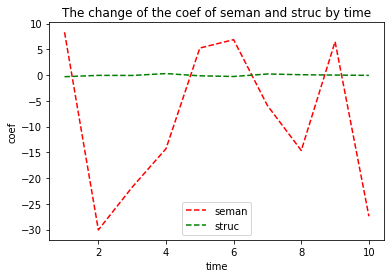

In [200]:
# coding:utf-8
import numpy as np
import matplotlib.pyplot as plt
x = range(1,11)
l1=plt.plot(x,semans,'r--',label='seman')
l2=plt.plot(x,strucs,'g--',label='struc')
plt.title('The change of the coef of seman and struc by time')
plt.xlabel('time')
plt.ylabel('coef')
plt.legend()
plt.show()

In [364]:
np.corrcoef(final['seman2'], final['true'])

array([[1.        , 0.13616477],
       [0.13616477, 1.        ]])